### Access libraries that will be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [2]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,PlayerID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,vucevni01,30-111,C,2/12/2021,ORL,@,SAC,W,...,1,8,9,4,2,0,1,1,42,24.7
1,Nikola,Vucevic,vucevni01,30-104,C,2/5/2021,ORL,NaN,CHI,W,...,3,16,19,4,0,1,1,2,43,14.2
2,Nikola,Vucevic,vucevni01,30-084,C,1/16/2021,ORL,@,BRK,L,...,4,6,10,7,5,0,4,4,34,18.5
3,Nikola,Vucevic,vucevni01,30-118,C,2/19/2021,ORL,NaN,GSW,W,...,0,16,16,10,1,1,0,1,30,12.5
4,Nikola,Vucevic,vucevni01,30-120,C,2/21/2021,ORL,NaN,DET,W,...,0,12,12,3,1,2,1,2,37,NaN


In [3]:
magic.tail()

,FirstName,LastName,PlayerID,Age,Pos,Date,Tm,H/A,Opp,W/L,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
307,Gary,Clark,clarkga01,26-063,F,1/18/2021,ORL,@,NYK,L,...,0,2,2,0,0,1,0,1,0,-15.3
308,Gary,Clark,clarkga01,26-053,F,1/8/2021,ORL,@,HOU,L,...,0,4,4,0,0,1,2,1,0,-15.8
309,Aaron,Gordon,gordoaa01,25-133,F,1/27/2021,ORL,NaN,SAC,L,...,1,4,5,5,0,0,4,4,3,-19.5
310,Dwayne,Bacon,bacondw01,25-141,G,1/18/2021,ORL,@,NYK,L,...,0,1,1,1,0,0,1,5,2,-18.3
311,Dwayne,Bacon,bacondw01,25-147,G,1/24/2021,ORL,NaN,CHO,L,...,0,3,3,2,0,0,3,4,2,-26.7


### Display data using histogram, swarmplot, and boxplot

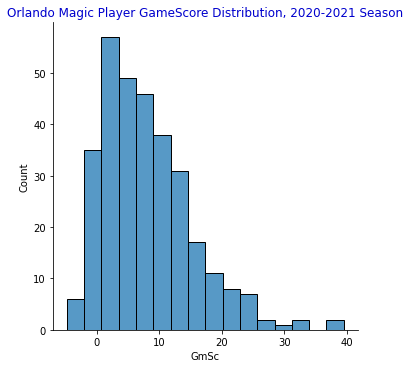

In [4]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

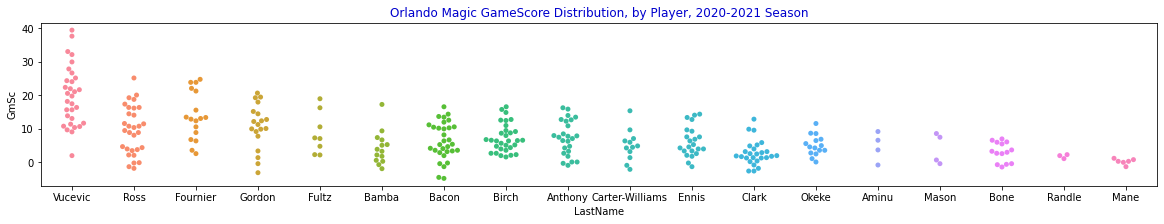

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

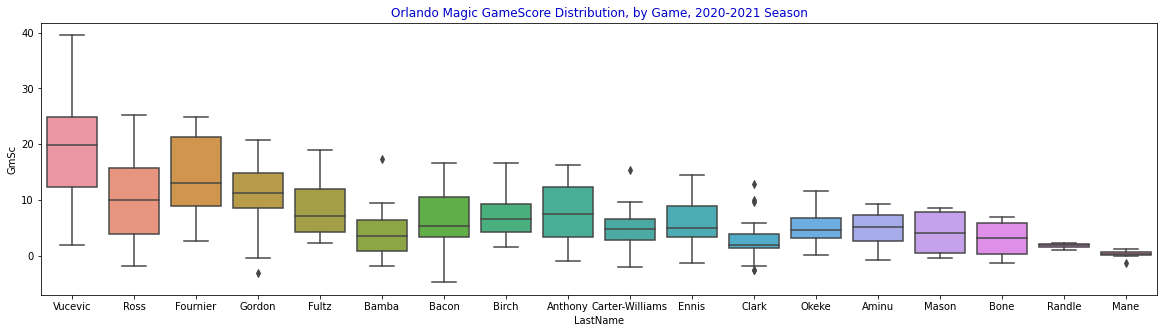

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


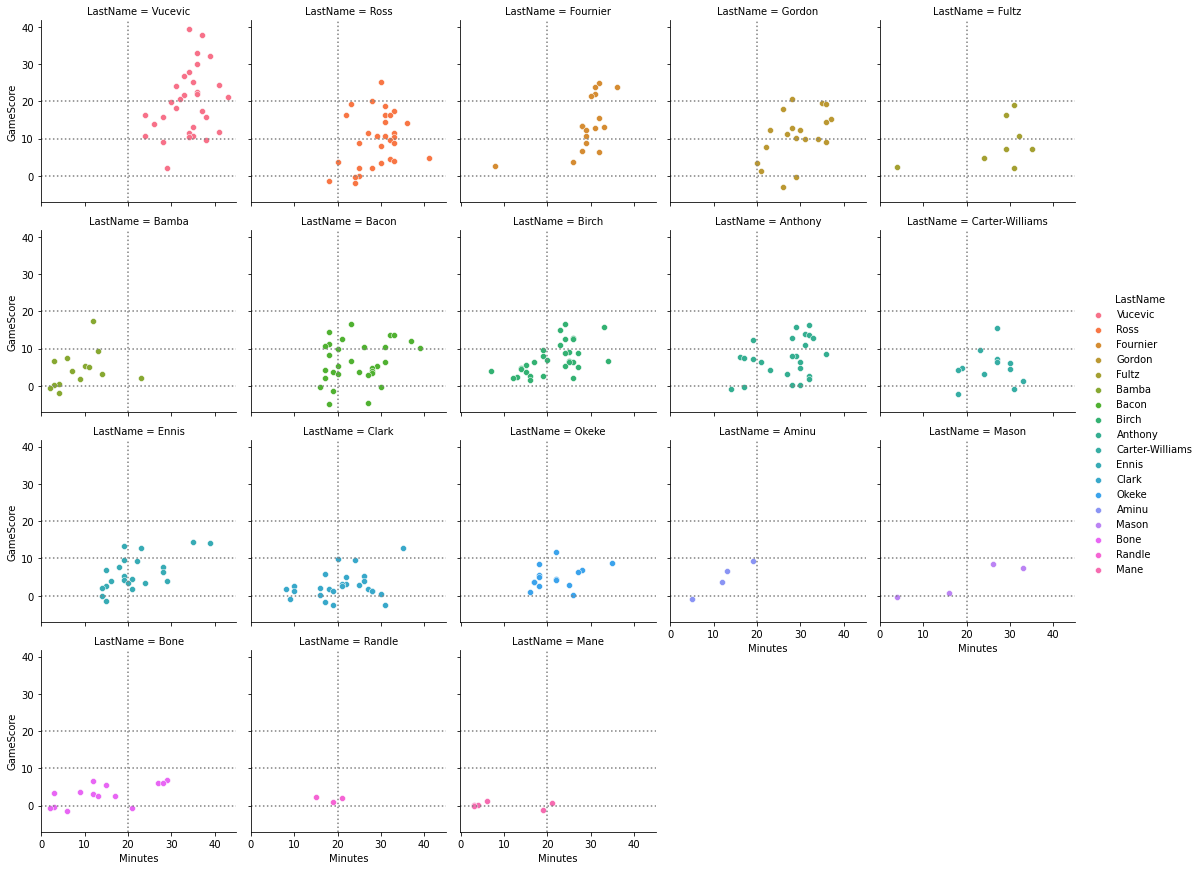

In [9]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.map(plt.axhline, y=10, ls=":", c=".5")
grid.map(plt.axhline, y=20, ls=":", c=".5")
grid.map(plt.axhline, y=0, ls=":", c=".5")
grid.map(plt.axvline, x=20, ls=":", c=".5")
grid.add_legend()
grid.set(xlabel="Minutes", ylabel="GameScore")
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

K:\Users\adria\Downloads\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


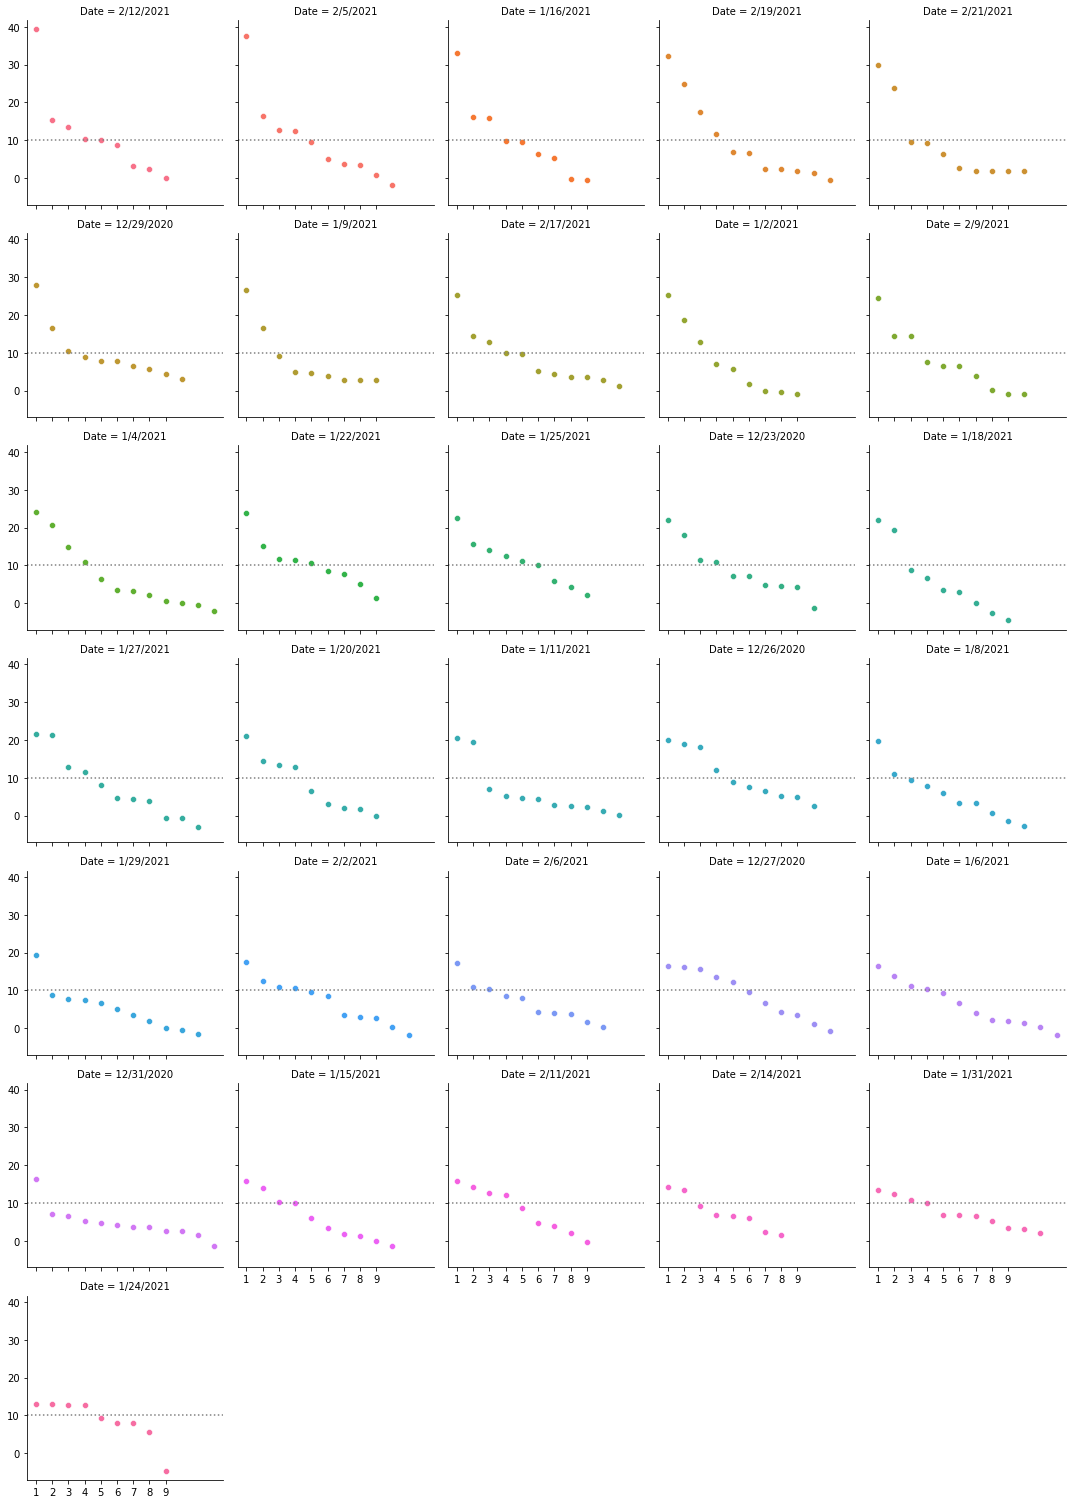

In [10]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [15]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                       
                count       mean       std  min     25%    50%     75%   max
LastName                                                                    
Aminu             4.0   4.675000  4.285927 -0.8   2.575   5.15   7.250   9.2
Anthony          25.0   7.356000  5.208893 -0.9   3.300   7.50  12.300  16.3
Bacon            31.0   6.390323  5.537951 -4.8   3.300   5.40  10.550  16.6
Bamba            14.0   4.335714  4.937705 -1.9   0.900   3.60   6.350  17.3
Birch            31.0   7.287097  4.235543  1.6   4.200   6.50   9.350  16.6
Bone             14.0   3.100000  2.936246 -1.4   0.350   3.15   5.875   7.0
Carter-Williams  12.0   4.991667  4.668942 -2.1   2.750   4.70   6.575  15.4
Clark            26.0   2.784615  3.673548 -2.6   1.300   1.95   3.800  12.9
Ennis            22.0   6.190909  4.525263 -1.3   3.400   4.95   8.875  14.4
Fournier         17.0  13.870588  7.177723  2.6   8.900  13.10  21.300  24.8
Fultz             8.0   8.700000  6.215189  2.2   4.175   7.20  12.025  19.0
Gordon           19.0  10.747368  6.728164 -3.1   8.500  11.30  14.850  20.7
Mane              6.0   0.216667  0.856543 -1.3   0.075   0.30   0.675   1.2
Mason             4.0   4.100000  4.605070 -0.4   0.425   4.10   7.775   8.6
Okeke            15.0   5.033333  3.062368  0.1   3.200   4.60   6.700  11.6
Randle            3.0   1.800000  0.624500  1.1   1.550   2.00   2.150   2.3
Ross             30.0   9.673333  7.170001 -1.8   3.850   9.95  15.775  25.2
Vucevic          31.0  19.829032  8.938948  2.0  12.400  19.80  24.800  39.5

In [16]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','MP']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc    MP
LastName                    
Vucevic          614.7  1048
Ross             290.2   870
Fournier         235.8   493
Birch            225.9   658
Gordon           204.2   554
Bacon            198.1   755
Anthony          183.9   664
Ennis            136.2   473
Okeke             75.5   329
Clark             72.4   545
Fultz             69.6   215
Bamba             60.7   121
Carter-Williams   59.9   307
Bone              43.4   197
Aminu             18.7    49
Mason             16.4    79
Randle             5.4    55
Mane               1.3    56


In [17]:
print ("\033[1m"+(colored("Total Minutes Played, by Player", 'blue'))+"\033[0m")
game_score = magic[['MP','LastName','GmSc']].groupby(['LastName']).sum()
sort_game_score = game_score.sort_values(by=['MP'], ascending=False)
print(sort_game_score)

Total Minutes Played, by Player
                   MP   GmSc
LastName                    
Vucevic          1048  614.7
Ross              870  290.2
Bacon             755  198.1
Anthony           664  183.9
Birch             658  225.9
Gordon            554  204.2
Clark             545   72.4
Fournier          493  235.8
Ennis             473  136.2
Okeke             329   75.5
Carter-Williams   307   59.9
Fultz             215   69.6
Bone              197   43.4
Bamba             121   60.7
Mason              79   16.4
Mane               56    1.3
Randle             55    5.4
Aminu              49   18.7


In [18]:
print ("\033[1m"+(colored("Aggregate Team GameScore, by Game", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName','Date']].groupby(['Date']).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Aggregate Team GameScore, by Game
             GmSc
Date             
2/19/2021   106.9
12/26/2020  105.0
2/12/2021   103.6
2/5/2021     99.7
12/29/2020   99.2
12/27/2020   98.6
1/25/2021    98.1
1/16/2021    95.7
1/22/2021    95.5
2/17/2021    93.0
2/21/2021    89.6
12/23/2020   89.1
1/27/2021    84.2
1/4/2021     83.9
1/31/2021    80.5
1/24/2021    77.9
2/2/2021     77.5
2/9/2021     76.2
1/6/2021     75.4
1/20/2021    75.2
1/9/2021     74.3
2/11/2021    73.3
1/11/2021    70.3
1/2/2021     69.9
2/6/2021     69.3
1/15/2021    61.1
2/14/2021    59.8
1/29/2021    58.8
1/8/2021     57.8
12/31/2020   56.7
1/18/2021    56.2


In [19]:
magic.describe()

,GmSc,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
count,312.000000,312.000000,312.000000,312.000000,312.000000,300.000000,312.000000,312.000000,282.000000,312.000000,...,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,302.000000
mean,8.052244,0.496795,23.935897,3.881410,8.990385,0.416937,2.740385,5.746795,0.477709,1.141026,...,1.105769,3.583333,4.689103,2.240385,0.698718,0.435897,1.262821,1.705128,10.487179,-2.149338
std,7.390360,0.500793,8.818411,3.279387,6.266578,0.214393,2.532091,4.562886,0.274988,1.358308,...,1.397643,2.968123,3.571431,2.179244,0.917286,0.749529,1.337619,1.342925,8.423277,10.059800
min,-4.800000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-37.700000
25%,2.675000,0.000000,18.000000,1.000000,4.000000,0.286000,1.000000,2.000000,0.302000,0.000000,...,0.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,-7.600000
50%,6.500000,0.000000,25.000000,3.000000,8.000000,0.410500,2.000000,5.000000,0.500000,1.000000,...,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,1.500000,8.000000,-2.700000
75%,12.325000,1.000000,31.000000,6.000000,13.000000,0.533000,4.000000,9.000000,0.667000,2.000000,...,2.000000,5.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,15.000000,2.800000
max,39.500000,1.000000,43.000000,17.000000,29.000000,1.000000,13.000000,21.000000,1.000000,6.000000,...,10.000000,16.000000,19.000000,10.000000,5.000000,4.000000,6.000000,6.000000,43.000000,60.300000
